# Automating QUBO Conversion

In [1]:
!pip install numpy
!pip install cplex
!pip install qiskit-optimization

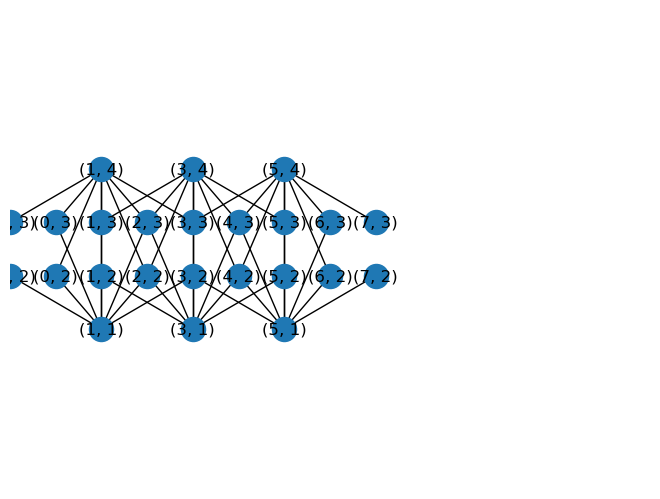

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()


points1 = [] #placement of lidars for one side
points2 = [] #placement of lidars for other side
points3 = [] #vertices to cover


for i in range(1, 6, 2):
    point = (i, 1)
    points1.append(point)

for i in range(1, 6, 2):
    point = (i, 4)
    points2.append(point)

for i in range(0, 7):
    for j in range(2, 4):
        point = (i, j)
        points3.append(point)

G.add_nodes_from(points1 + points2 + points3)


#edge that represents scope between lidar placement and vertices to cover
for node1 in points1:
  for j in range (node1[1]+1, node1[1]+3):
    if(j==node1[1]+1):
      for i in range(node1[0]-2, node1[0]+3):
        G.add_edge(tuple(node1), (i,j))
    if(j== node1[1]+2):
      for i in range(node1[0]-1, node1[0]+2):
        G.add_edge(tuple(node1), (i,j))
for node2 in points2:
  for j in range (node2[1]-2,node2[1]):
    if(j== node2[1]-2):
      for i in range(node2[0]-1, node2[0]+2):
        G.add_edge(tuple(node2), (i,j))
    if(j==node2[1]-1):
      for i in range(node2[0]-2, node2[0]+3):
        G.add_edge(tuple(node2), (i,j))
    

# Draw the graph
pos = {node: node for node in G.nodes()} 
nx.draw(G, pos, with_labels=True)

plt.xlim(-2, 13)
plt.ylim(-2, 7)

plt.xticks(range(0, 13))
plt.yticks(range(1, 7))

plt.show()


In [3]:
import os
from platform import node
import numpy as np
import qiskit_optimization
from docplex.mp.model import Model
from qiskit_optimization.problems import QuadraticProgram
import networkx as nx


m = Model(name='BMW')
pointsL = points1 + points2
x = m.binary_var_dict(pointsL, name='x')
m.objective_expr = sum(x[i] for i in pointsL) #minimize the placement of lidars
m.objective_sense = 'min'

y = m.binary_var_dict(G.edges, name='y')
#constraint on edge covering all vertices (allows to ensure that at least one lidar covers the area)
for node in points3:
  degre = len(G.edges(node))
  invEdges = [(i[1], i[0]) for i in G.edges(node)]
  m.add_constraint(sum(y[i] for i in invEdges) <= degre)
  m.add_constraint(sum(y[i] for i in invEdges) >= 1)

#Link the relation between edge activation and lidar placement activation

for node in pointsL:
  m.add_constraint(sum(y[i] - x[node] for i in G.edges(node) if i[0] == node) == 0)

print(m.prettyprint())
m.export_as_lp(basename="BMW", path=os.path.abspath(""))

// This file has been generated by DOcplex
// model name is: BMW
// var contrainer section
dvar bool x[6];
dvar bool y[48];

minimize
 x_1_1 + x_3_1 + x_5_1 + x_1_4 + x_3_4 + x_5_4;
 
subject to {
 y_(1,_1)_(0,_2) + y_(1,_4)_(0,_2) <= 2;
 y_(1,_1)_(0,_2) + y_(1,_4)_(0,_2) >= 1;
 y_(1,_1)_(0,_3) + y_(1,_4)_(0,_3) <= 2;
 y_(1,_1)_(0,_3) + y_(1,_4)_(0,_3) >= 1;
 y_(1,_1)_(1,_2) + y_(3,_1)_(1,_2) + y_(1,_4)_(1,_2) <= 3;
 y_(1,_1)_(1,_2) + y_(3,_1)_(1,_2) + y_(1,_4)_(1,_2) >= 1;
 y_(1,_1)_(1,_3) + y_(1,_4)_(1,_3) + y_(3,_4)_(1,_3) <= 3;
 y_(1,_1)_(1,_3) + y_(1,_4)_(1,_3) + y_(3,_4)_(1,_3) >= 1;
 y_(1,_1)_(2,_2) + y_(3,_1)_(2,_2) + y_(1,_4)_(2,_2) + y_(3,_4)_(2,_2) <= 4;
 y_(1,_1)_(2,_2) + y_(3,_1)_(2,_2) + y_(1,_4)_(2,_2) + y_(3,_4)_(2,_2) >= 1;
 y_(1,_1)_(2,_3) + y_(3,_1)_(2,_3) + y_(1,_4)_(2,_3) + y_(3,_4)_(2,_3) <= 4;
 y_(1,_1)_(2,_3) + y_(3,_1)_(2,_3) + y_(1,_4)_(2,_3) + y_(3,_4)_(2,_3) >= 1;
 y_(1,_1)_(3,_2) + y_(3,_1)_(3,_2) + y_(5,_1)_(3,_2) + y_(3,_4)_(3,_2) <= 4;
 y_(1,_1)_(3,_2) +

'C:\\Users\\CYTech Student\\BMW.lp'

In [4]:

sol_model = m.solve()
#m.print_solution()                                                                                                                                                                                                                          ()
S = []
for (x, y) in sol_model.iter_var_values():
    sx = str(x)
    if sx[0] == 'x':
        S.append((int(sx[2]), int(sx[4])))

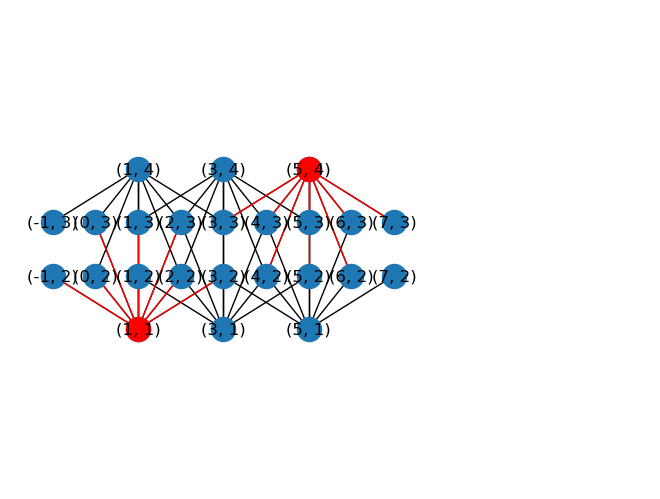

In [5]:

G = nx.Graph()


points1 = [] #placement of lidars for one side
points2 = [] #placement of lidars for other side
points3 = [] #vertices to cover


for i in range(1, 6, 2):
    point = (i, 1)
    points1.append(point)

for i in range(1, 6, 2):
    point = (i, 4)
    points2.append(point)

for i in range(0, 7):
    for j in range(2, 4):
        point = (i, j)
        points3.append(point)

G.add_nodes_from(points1 + points2 + points3)


#edge that represents scope between lidar placement and vertices to cover
for node1 in points1:
  for j in range (node1[1]+1, node1[1]+3):
    if(j==node1[1]+1):
      for i in range(node1[0]-2, node1[0]+3):
        G.add_edge(tuple(node1), (i,j))
    if(j== node1[1]+2):
      for i in range(node1[0]-1, node1[0]+2):
        G.add_edge(tuple(node1), (i,j))
for node2 in points2:
  for j in range (node2[1]-2,node2[1]):
    if(j== node2[1]-2):
      for i in range(node2[0]-1, node2[0]+2):
        G.add_edge(tuple(node2), (i,j))
    if(j==node2[1]-1):
      for i in range(node2[0]-2, node2[0]+3):
        G.add_edge(tuple(node2), (i,j))
actE =[]
for node in S:
  for edge in G.edges(node):
    actE.append(edge)
# Draw the graph
pos = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True)

plt.xlim(-2, 13)
plt.ylim(-2, 7)

plt.xticks(range(1, 13))
plt.yticks(range(1, 7))
nx.draw_networkx_nodes(G, pos, S, node_color='red')
nx.draw_networkx_edges(G, pos, actE, edge_color='red')
plt.show()

In [ ]:
#PREMIER TEST
import os
from platform import node
import numpy as np
import qiskit_optimization
from docplex.mp.model import Model
from qiskit_optimization.problems import QuadraticProgram
import networkx as nx

m = Model(name='BMW')
pointsL = points1 + points2
x = m.binary_var_dict(pointsL, name='x')
m.objective_expr = sum(x[i] for i in pointsL) #minimize the placement of lidars
m.objective_sense = 'min'

#constraint on edge covering all vertices (allows to ensure that at least one lidar covers the area)
for node in points3:
  y = m.binary_var_dict(G.edges(node), name='y')
  degre = len(y)
  print(len(y))
  m.add_constraint(sum(y[i] for i in G.edges(node)) <= degre)
  m.add_constraint(sum(y[i] for i in G.edges(node)) >= 1)

print(m.prettyprint())
m.export_as_lp(basename="BMW", path=os.path.abspath(""))

#Link the relation between edge activation and lidar placement activation
for node in pointsL:
 invEdges = [(i[1], i[0]) for i in G.edges(node)]#need to link the same edge from constraint 2 and the lidars placement
 y = m.binary_var_dict(invEdges, name='y')
 m.add_constraint(sum(y[i] - x[node] for i in invEdges if i[1] == node) == 0)